# Praktikum 2021
This notebook sample plots from the following data sources in `{basedir}/postprocessed/` that have been prepared using the notebook `praktikum_preprocess.ipynb`
- Praktikum System
- Sonic output

In [1]:
# import packages we need in this notebook
%matplotlib inline
import pandas as pd
import dask.dataframe as dd
from datetime import datetime, timedelta, date
import time, os
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

## Basic settings

In [3]:
#start_date=datetime(2020,8,24)
#end_date=datetime(2020,9,8)

basedir="/Users/jkjellsson/Downloads/praktikum/data_2021/"

#licor_file_output=f'{basedir}/postprocessed/licor_8min.csv'
sonic_file_output=f'{basedir}/postprocessed/sonic.csv'
#friedrichs_operational_output=f'{basedir}/postprocessed/friedrichs_operational_8min.csv'
friedrichs_praktikum_output=f'{basedir}/postprocessed/friedrichs_praktikum_8min.csv'
#lighthouse_operational_output=f'{basedir}/postprocessed/lighthouse_operational_8min.csv'

## Plot data from Praktikum System

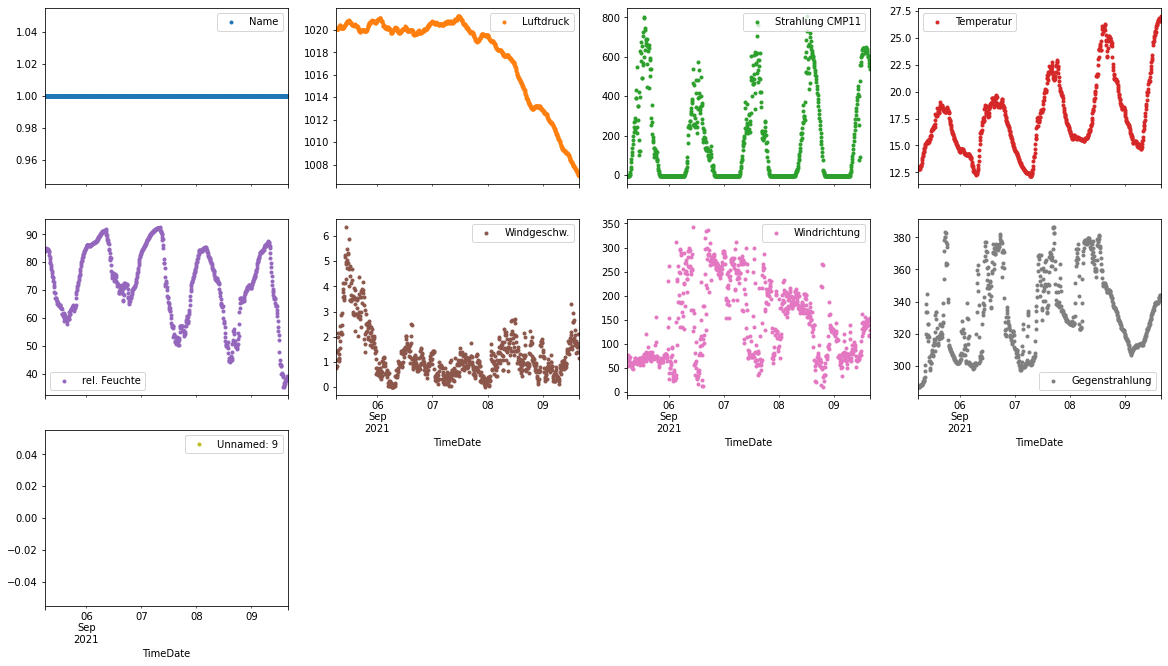

In [4]:
tf_data = (pd.read_csv(friedrichs_praktikum_output)).set_index('TimeDate')
tf_data.index = pd.to_datetime(tf_data.index)
plot = tf_data.plot(linestyle='None', marker=".", subplots=True, layout=(3,4),figsize=(20,11))

In [43]:
print(tf_data.index)

DatetimeIndex(['2021-09-05 06:00:00', '2021-09-05 06:08:00',
               '2021-09-05 06:16:00', '2021-09-05 06:24:00',
               '2021-09-05 06:32:00', '2021-09-05 06:40:00',
               '2021-09-05 06:48:00', '2021-09-05 06:56:00',
               '2021-09-05 07:04:00', '2021-09-05 07:12:00',
               ...
               '2021-09-09 14:32:00', '2021-09-09 14:40:00',
               '2021-09-09 14:48:00', '2021-09-09 14:56:00',
               '2021-09-09 15:04:00', '2021-09-09 15:12:00',
               '2021-09-09 15:20:00', '2021-09-09 15:28:00',
               '2021-09-09 15:36:00', '2021-09-09 15:44:00'],
              dtype='datetime64[ns]', name='TimeDate', length=794, freq=None)


## Plot Sonic data

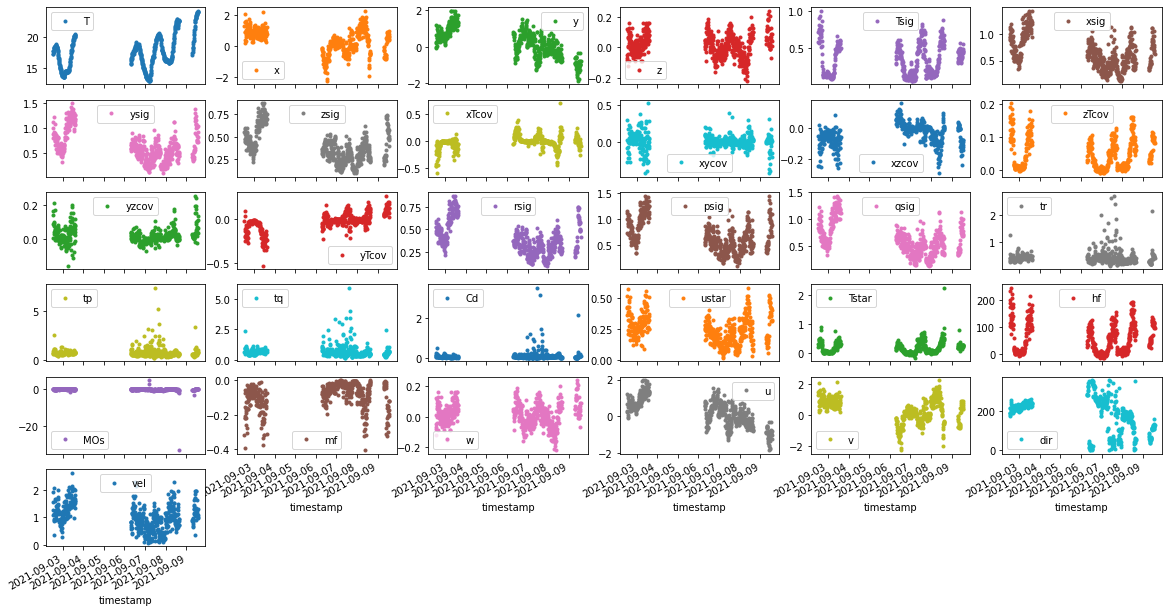

In [5]:
sonic_data = (pd.read_csv(sonic_file_output)).set_index('timestamp')
sonic_data.index = pd.to_datetime(sonic_data.index)
plot = sonic_data.plot(linestyle='None', marker=".", subplots=True, layout=(6,6),figsize=(20,11))

In [45]:
print(sonic_data.index)

DatetimeIndex(['2021-09-02 12:49:04', '2021-09-02 12:59:04',
               '2021-09-02 13:09:04', '2021-09-02 13:19:04',
               '2021-09-02 13:29:04', '2021-09-02 13:39:04',
               '2021-09-02 13:49:04', '2021-09-02 13:59:04',
               '2021-09-02 14:09:04', '2021-09-02 14:19:04',
               ...
               '2021-09-09 12:09:04', '2021-09-09 12:19:04',
               '2021-09-09 12:29:04', '2021-09-09 12:39:04',
               '2021-09-09 12:49:04', '2021-09-09 12:59:04',
               '2021-09-09 13:09:04', '2021-09-09 13:19:04',
               '2021-09-09 13:29:04', '2021-09-09 13:39:04'],
              dtype='datetime64[ns]', name='timestamp', length=540, freq=None)


## Plot handheld data

In [6]:
handheld_file_output=f'{basedir}/handheld/Praktikum_2021.csv'

dateparse = lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M')
hh_data = pd.read_csv(handheld_file_output, header=0, decimal='.',
                      names=['Time','Tdry','Twet','Hum','TdryH','P','CC','Vis'],
                      parse_dates=['Time'], date_parser=dateparse,
                     ).set_index('Time')

## Plot handheld data

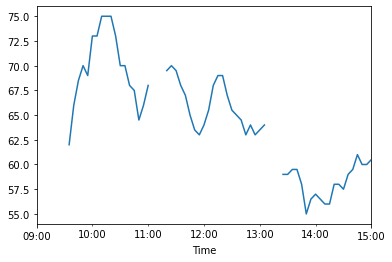

In [11]:
fig1, ax1 = plt.subplots(1,1)

# plot just the first day
hh_data['Hum']['2021-09-06 09:00:00':'2021-09-06 15:00:00'].plot(ax=ax1)

## Compare handheld to Sonic

Interpolate to 10m frequency to match Sonic

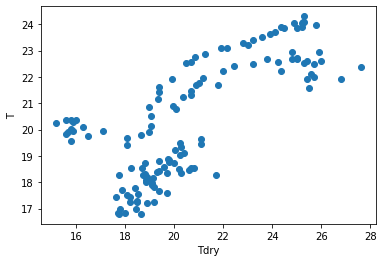

In [36]:
# make 1x1 plot
fig1, ax1 = plt.subplots(1,1)

# choose variable from handheld
v1 = 'Tdry'
# choose variable from Sonic
v2 = 'T'
# resample data to 10m means
hh = hh_data[v1].resample('10T').mean()
zz = sonic_data[v2].resample('10T').mean()
# align the time series
df = pd.concat([hh, zz], axis=1, keys=(v1,v2))
# plot 
ax1.scatter(df[v1],df[v2])
ax1.set_xlabel(v1);
ax1.set_ylabel(v2);

## Compare Friedrich and Handheld


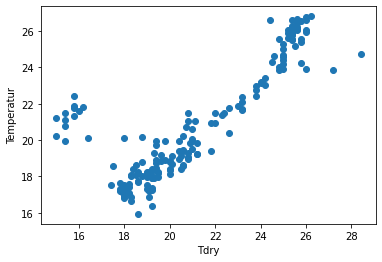

In [46]:
# make 1x1 plot
fig1, ax1 = plt.subplots(1,1)

# choose variable from handheld
v1 = 'Tdry'
# choose variable from TF
v2 = 'Temperatur'
# resample data to 10m means
hh = hh_data[v1].resample('5T').mean()
zz = tf_data[v2].resample('5T').mean()
# align the time series
df = pd.concat([hh, zz], axis=1, keys=(v1,v2))
# plot 
ax1.scatter(df[v1],df[v2])
ax1.set_xlabel(v1);
ax1.set_ylabel(v2);

## Compare Sonic and Friedrichs

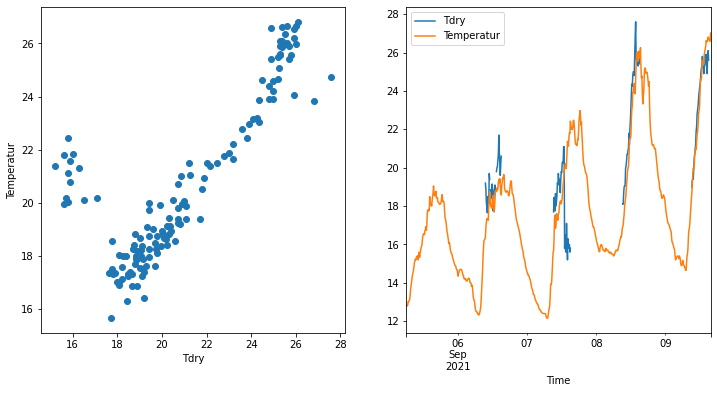

In [12]:
# make 1x1 plot
fig1, ax1 = plt.subplots(1,2,figsize=(12,6))

# choose variable from sonic
v1 = 'Tdry'
# choose variable from TF
v2 = 'Temperatur'
# resample data to 10m means
hh = hh_data[v1].resample('10T').mean()
zz = tf_data[v2].resample('10T').mean()
# align the time series
df = pd.concat([hh, zz], axis=1, keys=(v1,v2))
# plot 
ax1[0].scatter(df[v1],df[v2])
ax1[0].set_xlabel(v1);
ax1[0].set_ylabel(v2);

hh.plot(ax=ax1[1],label=v1)
df[v2].plot(ax=ax1[1],label=v2)
ax1[1].legend();